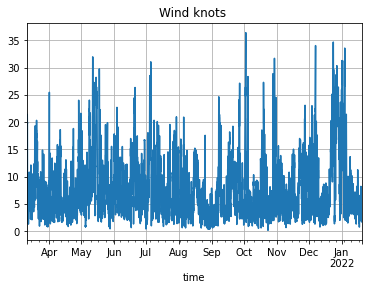

In [1]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/ria_enm_windplus.csv",
                      usecols=["time","spd_udr"],parse_dates=["time"],index_col="time")

#resample mean  gust hour before km/h a m/s
station = station.resample("H",label="right",closed="right").mean()*0.277778

#label
labels = ["F0","F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12"]
interval = pd.IntervalIndex.from_tuples([(-1, 0.5), (.5, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,13.8),(13.8,17.1),
                                     (17.1,20.7),(20.7,24.4),(24.4,28.4),(28.4,32.6),(32.6,60)])
station["spd_udr_l"] = pd.cut(station.spd_udr, bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#Show knots
(station.spd_udr*1.94384).plot(title="Wind knots ", grid=True);

**Meteorological model points 5 nearest**

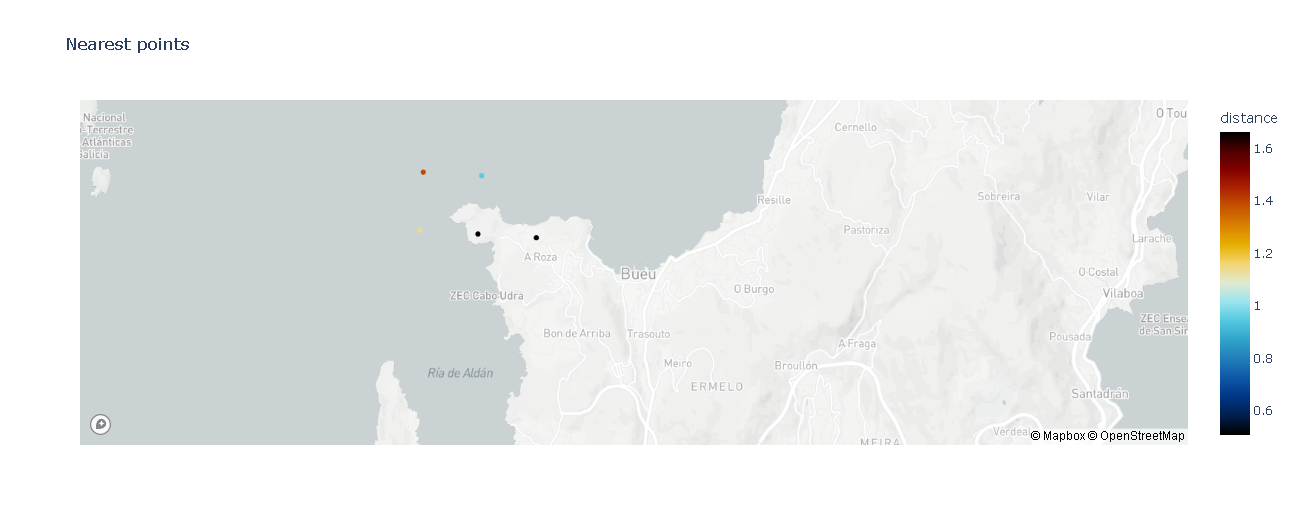

In [7]:
#Udra forecast and concat with station
met_model0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p5R1KmD2.csv",
                         parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
df_all = pd.concat([station,met_model0],axis=1).dropna()
df_all = df_all.drop(columns=["spd_udr"])
df_all

,spd_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape4,cin4,cfh4,cfl4,cfm4,cft4,HGT5004,HGT8504,T5004,T8504
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,F3,232.897141,0.0,1145.400635,5.608826,6.211264,102491.281250,285.377869,0.808105,24049.521484,...,77.040001,0.000262,0.0,0.393935,0.0,0.393935,5584.541016,1533.855957,251.110443,273.145264
2021-03-13 01:00:00,F3,236.505875,0.0,1128.458130,6.948990,7.696385,102559.281250,285.492065,0.779223,24046.267578,...,78.419998,-0.481832,0.0,0.470000,0.0,0.470000,5587.729492,1529.910156,251.444870,272.633423
2021-03-13 02:00:00,F3,234.612900,0.0,1150.002808,8.757957,9.452009,102508.210938,284.922882,0.844420,24043.474609,...,65.029999,-2.693566,0.0,0.300000,0.0,0.300000,5586.957031,1521.910156,251.895187,272.973328
2021-03-13 03:00:00,F3,236.279633,0.0,1181.897949,7.668866,8.860730,102383.453125,285.240570,0.804150,24043.093750,...,40.270000,-1.000844,0.0,0.900000,0.0,0.900000,5578.222168,1520.360596,252.164505,273.228485
2021-03-13 04:00:00,F4,241.957916,0.0,1146.495483,7.406095,8.115970,102304.625000,285.334991,0.795514,24042.619141,...,67.910004,-0.156582,0.0,0.500000,0.0,0.500000,5569.572754,1515.353149,252.610504,272.584564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 20:00:00,F2,43.680397,0.0,1698.977539,3.625998,4.197966,103129.132812,285.463257,0.667967,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5692.219238,1601.008057,252.227371,278.271637
2022-01-19 21:00:00,F2,22.350975,0.0,1681.663574,3.866589,4.258311,103112.335938,285.198822,0.654558,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5692.825684,1599.856445,252.100815,278.134125
2022-01-19 22:00:00,F2,22.843403,0.0,1672.513062,4.275271,4.541919,103171.335938,284.865692,0.672581,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5694.841797,1600.931885,252.302994,278.410492


In [10]:
#label meteorological model variables mod0 and mod4
df_all["mod0_l"] = pd.cut(df_all["mod0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all["mod4_l"] = pd.cut(df_all["mod4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all[["spd_udr_l","mod0_l","mod4_l"]]

,spd_udr_l,mod0_l,mod4_l
time,,,
2021-03-13 00:00:00,F3,F4,F4
2021-03-13 01:00:00,F3,F4,F4
2021-03-13 02:00:00,F3,F5,F5
2021-03-13 03:00:00,F3,F4,F5
2021-03-13 04:00:00,F4,F4,F4
...,...,...,...
2022-01-19 20:00:00,F2,F3,F3
2022-01-19 21:00:00,F2,F3,F2
2022-01-19 22:00:00,F2,F3,F3


**meteorological model score point 0**

In [12]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.3394lon-8.8339p5R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
#px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           #color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



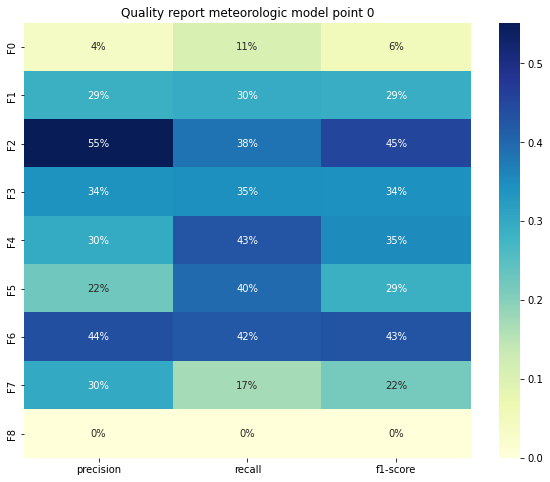

In [13]:
#meteorological model score point 0
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

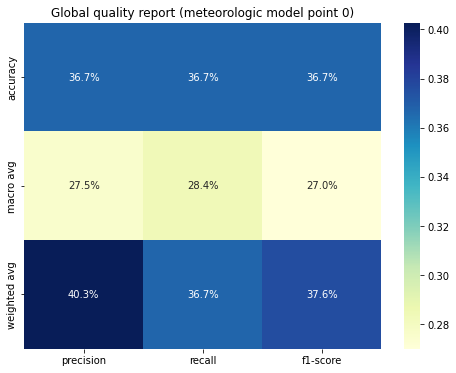

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

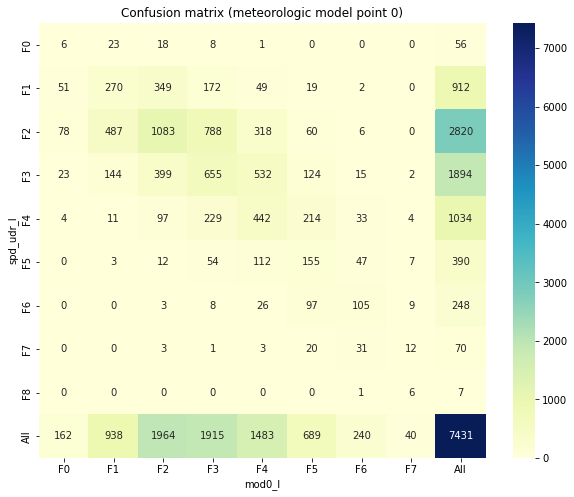

In [15]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

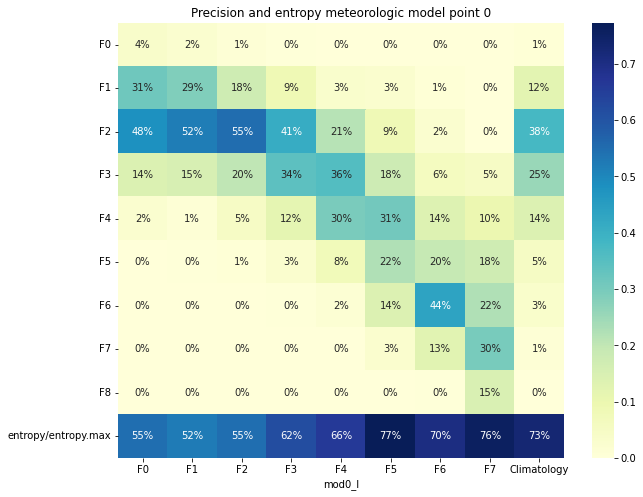

In [16]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 4**

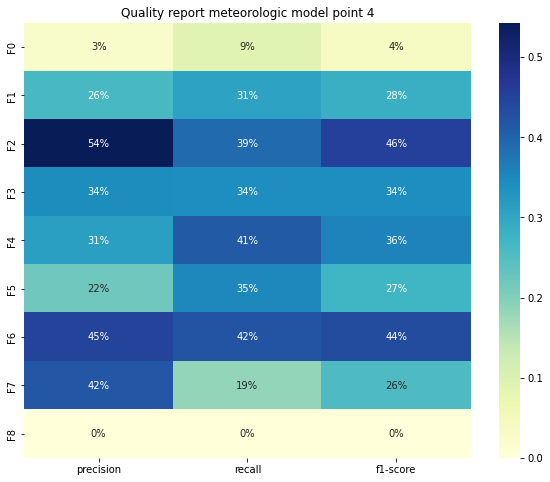

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 4")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod4_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

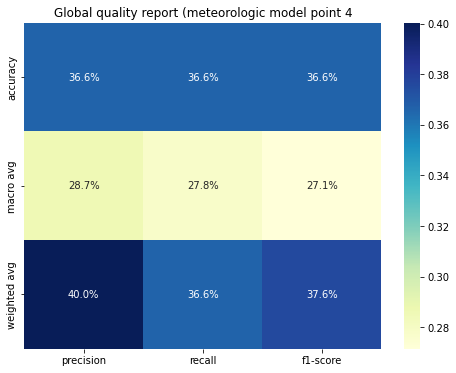

In [18]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 4")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

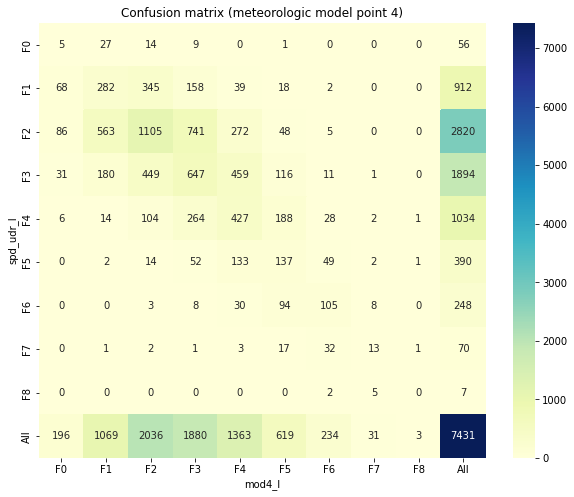

In [19]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 4)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod4_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

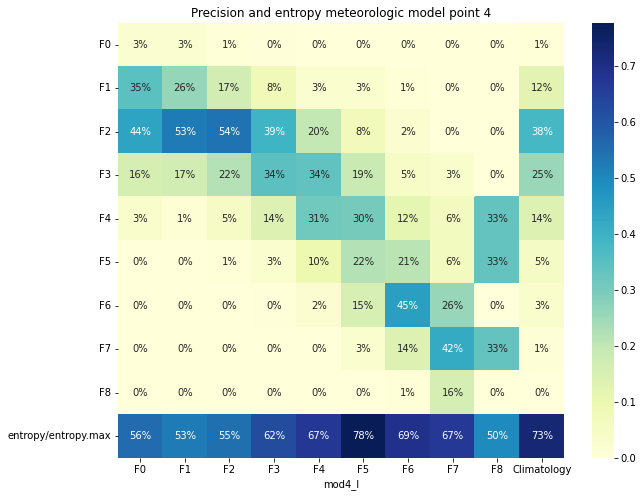

In [20]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 4")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod4_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Machine learning**

In [ ]:
!pip install lazypredict

In [22]:
#X variables
df_all.iloc[:,1:-3].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'shflx4', 'cape4', 'cin4', 'cfh4', 'cfl4', 'cfm4', 'cft4', 'HGT5004',
       'HGT8504', 'T5004'],
      dtype='object', length=124)

In [23]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,2:-3]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [02:49<00:00,  5.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.61,0.44,None,0.60,1.83
LabelSpreading,0.53,0.42,None,0.54,3.09
LabelPropagation,0.53,0.42,None,0.54,1.88
LinearDiscriminantAnalysis,0.45,0.41,None,0.43,0.31
NearestCentroid,0.31,0.40,None,0.34,0.10
BernoulliNB,0.31,0.39,None,0.35,0.11
RandomForestClassifier,0.58,0.38,None,0.56,5.40
KNeighborsClassifier,0.53,0.37,None,0.52,0.46
DecisionTreeClassifier,0.46,0.34,None,0.46,0.91


In [24]:
#X columns only point 0
df_all.iloc[:,1:20].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

**Machine learning LGBMClassifier**

In [29]:
import numpy as np
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0      F0  F1   F2   F3   F4  F5  F6  F7  F8   All
spd_udr_l                                             
F0          1   4    1    1    1   0   0   0   0     8
F1          5  24   76    8    3   2   4   2   0   124
F2          3  22  317   54   13   8  11   4   1   433
F3          3   6   86  131   29   7  13   2   1   278
F4          1   4   16   34   68  18  11   3   1   156
F5          0   1    5   10   22  16   8   3   0    65
F6          0   4    1    5    4   2  14   8   1    39
F7          0   0    1    0    1   1   5   3   0    11
F8          0   0    0    0    1   0   0   0   0     1
All        13  65  503  243  142  54  66  25   4  1115

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 0.08    0.12      0.10     8.00
F1                 0.37    0.19      0.25   124.00
F2                 0.63    0.73      0.68   433.00
F3                 0.54    0.47      0.50   278.00
F4        

**T test (1sample) compare machine learning mean accuracy in a sample (n=10) versus meteorological model mean accuracy at point 0 (37%). The alternative hypothesis is: the mean of the underlying distribution of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [26]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.37, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")


alpha:  0.01

accuracy list from machine learning test: [0.51, 0.55, 0.55, 0.49, 0.58, 0.42, 0.54, 0.44, 0.43, 0.55]

**** Point 0 ****

p_value point 0: 2.009975159456233e-05

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0


**Machine learning extratreesclassifier**

In [27]:
# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml_p = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_p.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml_p)


Confusion matrix  (Machine Learning)

col_0      F0  F1   F2   F3   F4  F5  F6  F7  F8   All
spd_udr_l                                             
F0          1   5    2    0    0   0   0   0   0     8
F1          0  26   86    6    5   1   0   0   0   124
F2          0  17  334   72    8   1   1   0   0   433
F3          0   3   91  149   32   2   0   0   1   278
F4          0   1   22   44   79   8   2   0   0   156
F5          0   0    3    7   22  23  10   0   0    65
F6          0   0    1    0    2   5  28   3   0    39
F7          0   0    1    0    0   0   5   5   0    11
F8          0   0    0    0    0   0   1   0   0     1
All         1  52  540  278  148  40  47   8   1  1115

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 1.00    0.12      0.22     8.00
F1                 0.50    0.21      0.30   124.00
F2                 0.62    0.77      0.69   433.00
F3                 0.54    0.54      0.54   278.00
F4        

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtratreesClassifier. Significance level (alpha) = 0.01**

In [28]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_p, alternative="less")

print("\nmeans with LGBMClassifier:", acc_ml)
print("\nmeans with extratreesclassifier:", acc_ml_p)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")
    print("\nwe are accepting alternative hypothesis: the mean of the sample with LGBMClassifier model is less than the mean of the sample with extratreesclassifier model")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")


means with LGBMClassifier: [0.51, 0.55, 0.55, 0.49, 0.58, 0.42, 0.54, 0.44, 0.43, 0.55]

means with extratreesclassifier: [0.58, 0.59, 0.58, 0.59, 0.58, 0.58, 0.59, 0.58, 0.56, 0.57]

alpha:  0.01

p_value point:  0.001115366977019018

we are rejecting null hypothesis  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model

we are accepting alternative hypothesis: the mean of the sample with LGBMClassifier model is less than the mean of the sample with extratreesclassifier model


**Save model**

In [30]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

In [31]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("spd_udr_1km_d2.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
